Значення функції у точці -3.0 = 4.0
Значення функції у точці -2.0 = 7.0
Значення функції у точці 2.0 = -21.0
Значення функції у точці 3.5 = 5.625


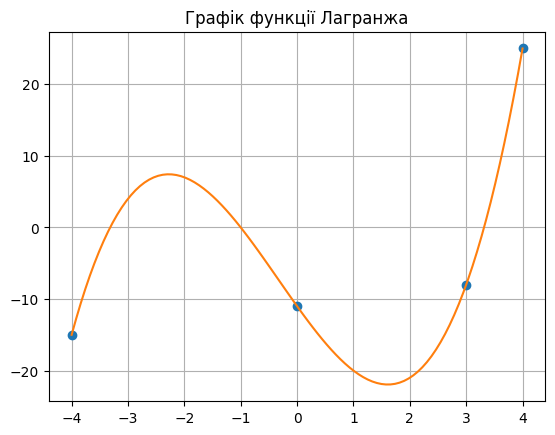

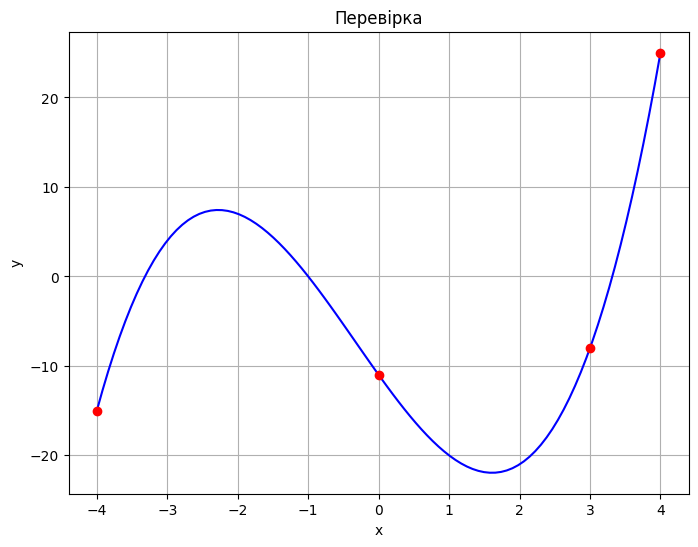

In [18]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.interpolate import lagrange #імпортуємо функцію lagrange з бібліотеки 

x=np.array([-4.,0.,3.,4.], dtype=float) 
y=np.array([-15.,-11.,-8.,25.], dtype=float) 
x_test = np.array([-3.,-2.,2.,3.5], dtype=float) # точки, в яких потрібно обчислити значення 

def lagrange_interpolation(x, y, x_test): 
    n = len(x) 
    p = np.zeros(n) # масив для зберігання значень багаточленів L_i 
    for i in range(n): 
        # обчислюємо багаточлен L_i, який складається з n членів 
        # кожен член дорівнює добутку (x-x_j)/(x_i-x_j) для j=0..n, j!=i 
        p_i = 1 
        for j in range(n): 
            if i != j: 
                p_i *= (x_test - x[j])/(x[i] - x[j]) 
        p[i] = p_i 
    return np.dot(y, p) # повертаємо значення багаточлена у точках x_test 

# обчислюємо інтерполяційний багаточлен та його значення у точках x_test 
for i in range(len(x_test)):
    f_interp = lagrange_interpolation(x, y, x_test[i]) 
    print(f"Значення функції у точці {x_test[i]} =", f_interp.round(4))

xnew=np.linspace(np.min(x),np.max(x),100) #точки, за якими будуємо графік 
ynew=[lagrange_interpolation(x,y,i) for i in xnew] 

#будуємо графік функції Лагранжа
plt.plot(x,y,'o',xnew,ynew)  
plt.title('Графік функції Лагранжа') 
plt.grid(True) 
plt.show() 

#Перевірка  
f = lagrange(x, y) 
fig = plt.figure(figsize = (8,6)) 
plt.plot(xnew, f(xnew), 'b', x, y, 'ro') 
plt.title('Перевірка') 
plt.grid() 
plt.xlabel('x') 
plt.ylabel('y') 
plt.show() 